<a href="https://colab.research.google.com/github/dldowning/Fall2022-5222/blob/main/Downing_Roberts_5222_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import panda as pd
import numpy as np
from statistics import mean
import nltk
from google.colab import files
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
import string
import random
import seaborn as sns
from nltk.corpus import stopwords
import csv
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Creating dataframe

In [ ]:
URL = "https://drive.google.com/uc?export=download&id=1C8ARH_yok3uOvirD_oKvgEmAR22SuC9R"
response = requests.get(URL)
open("train_text_labels.csv", "wb").write(response.content)

5123208

In [ ]:
URL = "https://drive.google.com/uc?export=download&id=1z0URnDJ8ck38mQ4CvHi5TUkly8e46glP"
response = requests.get(URL)
open("test_text.txt", "wb").write(response.content)

1156877

In [ ]:
URL = "https://drive.google.com/uc?export=download&id=1xWQ2Lpf866Be4OR8J-cJHuY1S25dWppf"
response = requests.get(URL)
open("test_labels.txt", "wb").write(response.content)

36850

In [ ]:
df0 = pd.read_csv("/content/train_text_labels.csv", header=None)
df0.columns = ['Twitter', 'Label']
len(df0)
#0	negative
#1	neutral
#2	positive

45615

In [ ]:
dft = pd.read_csv("/content/test_text.txt", sep="\n", header=None, quoting=csv.QUOTE_NONE)
dft.columns = ['Twitter']
len(dft)


12284

In [ ]:
dftl = pd.read_csv("/content/test_labels.txt", sep="\n", header=None)
dftl.columns = ['Label']
len(dftl)


12284

In [ ]:
dft['Label']=dftl['Label']
dft.head()

,Twitter,Label
0,@user @user what do these '1/2 naked pics' hav...,1
1,OH: “I had a blue penis while I was this” [pla...,1
2,"@user @user That's coming, but I think the vic...",1
3,I think I may be finally in with the in crowd ...,2
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",0


In [ ]:
df0['Label'].value_counts()

1    20673
2    17849
0     7093
Name: Label, dtype: int64

In [ ]:
df0['Twitter']=df0['Twitter'].apply(str.lower)
dft['Twitter']=dft['Twitter'].apply(str.lower)

In [ ]:
df0

,Twitter,Label
0,qt @user in the original draft of the 7th book...,2
1,ben smith / smith (concussion) remains out of ...,1
2,sorry bout the stream last night i crashed out...,1
3,chase headley's rbi double in the 8th inning o...,1
4,@user alciato: bee will invest 150 million in ...,2
...,...,...
45610,"@user \""""so amazing to have the beautiful lady...",2
45611,"9 september has arrived, which means apple's n...",2
45612,leeds 1-1 sheff wed. giuseppe bellusci securin...,2
45613,@user no i'm in hilton head till the 8th lol g...,1


In [ ]:
#dropping the neutrals
df = df0[df0['Label'] != 1]
df=df.reset_index(drop=True)
len(df)

24942

In [ ]:
#combined the two dataframes so I could safely reset the index
dft = dft[dft['Label'] != 1]
dft=dft.reset_index(drop=True)
len(dft)

6347

In [ ]:
df

,Twitter,Label
0,qt @user in the original draft of the 7th book...,2
1,@user alciato: bee will invest 150 million in ...,2
2,@user lit my mum 'kerry the louboutins i wonde...,2
3,"\"""" soul train\"""" oct 27 halloween special ft ...",2
4,so disappointed in wwe summerslam! i want to s...,0
...,...,...
24937,michael from good times is the 2nd greatest mi...,2
24938,just think some misguided girl is in the vip t...,0
24939,"@user \""""so amazing to have the beautiful lady...",2
24940,"9 september has arrived, which means apple's n...",2


In [ ]:
dft

,Twitter,Label
0,i think i may be finally in with the in crowd ...,2
1,"@user wow,first hugo chavez and now fidel cast...",0
2,twitter's #thankyouobama shows heartfelt grati...,2
3,@user @user @user @user @user @user take away ...,0
4,#onedirection #harrystyles cute little dance 😉,2
...,...,...
6342,@user for al the crying you do about how middl...,0
6343,"i'm not even catholic, but pope francis is my ...",2
6344,@user @user @user looks like flynn isn't too p...,0
6345,trying to have a conversation with my dad abou...,0


In [ ]:
#removing the stop words
stop = stopwords.words('english')
df['Twitter'] = df['Twitter'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dft['Twitter'] = dft['Twitter'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,Twitter,Label
0,"qt @user original draft 7th book, remus lupin ...",2
1,"@user alciato: bee invest 150 million january,...",2
2,@user lit mum 'kerry louboutins wonder many wi...,2
3,"\"""" soul train\"""" oct 27 halloween special ft ...",2
4,disappointed wwe summerslam! want see john cen...,0
...,...,...
24937,michael good times 2nd greatest michael. micha...,2
24938,think misguided girl vip tonight suckin dick &...,0
24939,"@user \""""so amazing beautiful lady gaga show a...",2
24940,"9 september arrived, means apple's new iphone ...",2


In [ ]:
df['Twitter'].str.replace('[{}]'.format(string.punctuation), '')
dft['Twitter'].str.replace('[{}]'.format(string.punctuation), '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0       think may finally crowd mannequinchallenge gra...
1       user wowfirst hugo chavez fidel castro danny g...
2       twitters thankyouobama shows heartfelt gratitu...
3       user user user user user user take away illega...
4            onedirection harrystyles cute little dance 😉
                              ...                        
6342    user al crying middle america left outthey twi...
6343    im even catholic pope francis dude like need h...
6344    user user user looks like flynn pleased me blo...
6345    trying conversation dad vegetarianism pointles...
6346        user stand guy gentleman vice president pence
Name: Twitter, Length: 6347, dtype: object

In [ ]:
df["Twitter"] = df['Twitter'].str.replace('[0-9]','')
df["Twitter"] = df['Twitter'].str.replace('[\\@\"]','')
df["Twitter"] = df['Twitter'].str.replace('[-#!?.&\*$\\\]','')
dft["Twitter"] = dft['Twitter'].str.replace('[0-9]','')
dft["Twitter"] = dft['Twitter'].str.replace('[\\@\"]','')
dft["Twitter"] = dft['Twitter'].str.replace('[-#!?.&\*$\\\]','')

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist

,Twitter,Label
0,"qt user original draft th book, remus lupin su...",2
1,"user alciato: bee invest million january, ano...",2
2,user lit mum 'kerry louboutins wonder many wil...,2
3,soul train oct halloween special ft tdot fin...,2
4,disappointed wwe summerslam want see john cena...,0
...,...,...
24937,michael good times nd greatest michael michael...,2
24938,think misguided girl vip tonight suckin dick ...,0
24939,user so amazing beautiful lady gaga show ac to...,2
24940,"september arrived, means apple's new iphone h...",2


In [ ]:
df['Twitter_tokens'] = df.apply(lambda row: nltk.word_tokenize(row['Twitter']), axis=1)
dft['Twitter_tokens'] = dft.apply(lambda row: nltk.word_tokenize(row['Twitter']), axis=1)

In [ ]:
df

,Twitter,Label,Twitter_tokens
0,"qt user original draft th book, remus lupin su...",2,"[qt, user, original, draft, th, book, ,, remus..."
1,"user alciato: bee invest million january, ano...",2,"[user, alciato, :, bee, invest, million, janua..."
2,user lit mum 'kerry louboutins wonder many wil...,2,"[user, lit, mum, 'kerry, louboutins, wonder, m..."
3,soul train oct halloween special ft tdot fin...,2,"[soul, train, oct, halloween, special, ft, tdo..."
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh..."
...,...,...,...
24937,michael good times nd greatest michael michael...,2,"[michael, good, times, nd, greatest, michael, ..."
24938,think misguided girl vip tonight suckin dick ...,0,"[think, misguided, girl, vip, tonight, suckin,..."
24939,user so amazing beautiful lady gaga show ac to...,2,"[user, so, amazing, beautiful, lady, gaga, sho..."
24940,"september arrived, means apple's new iphone h...",2,"[september, arrived, ,, means, apple, 's, new,..."


In [ ]:
df['Twitter_tokens'][0][1]
len(df)

24942

In [ ]:
#Evaluating the tokens for some EDA, also verifying I have no length 0
list_of_lengths=[]
less_than_9_len=[]
for i in range (0, 24942):
  try:
    list_of_lengths.append(len(df['Twitter_tokens'][i]));
  except:
    pass
  try:
    if len(df['Twitter_tokens'][i]) < 9:
      less_than_9_len.append(str(i));
  except:
    pass
print("The min length is: " + str(min(list_of_lengths)))
print("The max length is: " + str(max(list_of_lengths)))
print("The mean length is: " + str(mean(list_of_lengths)))
print("The number of tweets with less than 9 tokens is: " + str(len(less_than_9_len)))

The min length is: 1
The max length is: 31
The mean length is: 13.141207601635795
The number of tweets with less than 9 tokens is: 2674


In [ ]:
len(dft)

6347

In [ ]:
list_of_lengths=[]
less_than_9_len=[]
for i in range (0, 6347):
  try:
    list_of_lengths.append(len(dft['Twitter_tokens'][i]));
  except:
    pass
  try:
    if len(dft['Twitter_tokens'][i]) < 9:
      less_than_9_len.append(str(i));
  except:
    pass
print("The min test length is: " + str(min(list_of_lengths)))
print("The max test length is: " + str(max(list_of_lengths)))
print("The mean test length is: " + str(mean(list_of_lengths)))
print("The number of test tweets with less than 9 tokens is: " + str(len(less_than_9_len)))

The min test length is: 1
The max test length is: 28
The mean test length is: 11.1369150779896
The number of test tweets with less than 9 tokens is: 1666


#Loading and extracting TSVs

In [ ]:
!wget https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_freq.zip
!echo "N"| unzip /content/socialsent_hist_freq.zip

--2022-11-11 19:27:14--  https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_freq.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 521987 (510K) [application/zip]
Saving to: ‘socialsent_hist_freq.zip’

socialsent_hist_fre 100%[===================>] 509.75K   240KB/s    in 2.1s    

2022-11-11 19:27:17 (240 KB/s) - ‘socialsent_hist_freq.zip’ saved [521987/521987]

Archive:  /content/socialsent_hist_freq.zip
   creating: frequent_words/
  inflating: frequent_words/1850.tsv  
  inflating: frequent_words/1860.tsv  
  inflating: frequent_words/1870.tsv  
  inflating: frequent_words/1880.tsv  
  inflating: frequent_words/1890.tsv  
  inflating: frequent_words/1900.tsv  
  inflating: frequent_words/1910.tsv  
  inflating: frequent_words/1920.tsv  
  inflating: frequent_words/1930.tsv  
  inflating: frequent_words/1940.tsv  


In [ ]:
!wget https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_adj.zip
!echo "N"| unzip /content/socialsent_hist_adj.zip

--2022-11-11 19:27:17--  https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_adj.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201855 (197K) [application/zip]
Saving to: ‘socialsent_hist_adj.zip’

socialsent_hist_adj 100%[===================>] 197.12K   187KB/s    in 1.1s    

2022-11-11 19:27:19 (187 KB/s) - ‘socialsent_hist_adj.zip’ saved [201855/201855]

Archive:  /content/socialsent_hist_adj.zip
   creating: adjectives/
  inflating: adjectives/1850.tsv     
  inflating: adjectives/1860.tsv     
  inflating: adjectives/1870.tsv     
  inflating: adjectives/1880.tsv     
  inflating: adjectives/1890.tsv     
  inflating: adjectives/1900.tsv     
  inflating: adjectives/1910.tsv     
  inflating: adjectives/1920.tsv     
  inflating: adjectives/1930.tsv     
  inflating: adjectives/1940.tsv     
  inflating: adjec

In [ ]:
df_2000adj = pd.read_csv("/content/adjectives/2000.tsv", sep="\t", header=None)
df_2000adj.columns = ['Word', 'Sentiment', 'Std']
df_2000adj

,Word,Sentiment,Std
0,vile,-3.18,0.61
1,tragic,-3.15,0.66
2,ugly,-3.10,0.49
3,traumatic,-3.08,0.68
4,stinging,-3.05,0.56
...,...,...,...
2037,gorgeous,2.73,0.68
2038,serene,2.81,0.44
2039,fine,2.82,0.44
2040,wonderful,2.91,0.41


In [ ]:
df_2000freq = pd.read_csv("/content/frequent_words/2000.tsv", sep="\t", header=None)
df_2000freq.columns = ['Word', 'Sentiment', 'Std']
df_2000freq

,Word,Sentiment,Std
0,ugly,-3.90,1.16
1,painful,-3.69,1.53
2,intent,-3.49,1.67
3,terrible,-3.38,1.55
4,drunk,-3.28,1.16
...,...,...,...
4919,perfectly,2.69,0.83
4920,romantic,2.70,0.76
4921,delicate,2.72,0.93
4922,beautiful,2.73,0.69


In [ ]:
!wget https://nlp.stanford.edu/projects/socialsent/files/socialsent_subreddits.zip
!echo "N"| unzip /content/socialsent_subreddits.zip

--2022-11-11 19:27:19--  https://nlp.stanford.edu/projects/socialsent/files/socialsent_subreddits.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15659374 (15M) [application/zip]
Saving to: ‘socialsent_subreddits.zip’

socialsent_subreddi 100%[===================>]  14.93M  4.24MB/s    in 7.0s    

2022-11-11 19:27:27 (2.13 MB/s) - ‘socialsent_subreddits.zip’ saved [15659374/15659374]

Archive:  /content/socialsent_subreddits.zip
   creating: subreddits/
  inflating: subreddits/.zip         
  inflating: subreddits/2007scape.tsv  
  inflating: subreddits/3DS.tsv      
  inflating: subreddits/4chan.tsv    
  inflating: subreddits/ACTrade.tsv  
  inflating: subreddits/AdviceAnimals.tsv  
  inflating: subreddits/amiugly.tsv  
  inflating: subreddits/Anarcho_Capitalism.tsv  
  inflating: subreddits/Android.tsv  
  inflating: subreddits

In [ ]:
df_2000adj=df_2000adj.drop(columns='Std')
feature1=dict(df_2000adj.values)
feature1

{'vile': -3.18,
 'tragic': -3.15,
 'ugly': -3.1,
 'traumatic': -3.08,
 'stinging': -3.05,
 'awful': -2.89,
 'foul': -2.84,
 'horrific': -2.83,
 'fatal': -2.82,
 'sick': -2.81,
 'painful': -2.67,
 'unnatural': -2.64,
 'dire': -2.62,
 'terrible': -2.61,
 'minor': -2.59,
 'cruel': -2.59,
 'frightening': -2.59,
 'unlucky': -2.58,
 'hideous': -2.58,
 'miserable': -2.57,
 'mindless': -2.56,
 'hungry': -2.55,
 'insecure': -2.55,
 'ominous': -2.53,
 'terrifying': -2.47,
 'unbearable': -2.45,
 'mortal': -2.45,
 'worst': -2.43,
 'catastrophic': -2.42,
 'weak': -2.4,
 'lonely': -2.33,
 'innocent': -2.29,
 'needy': -2.22,
 'humiliating': -2.19,
 'selfish': -2.18,
 'creepy': -2.17,
 'greedy': -2.17,
 'poisonous': -2.16,
 'damned': -2.14,
 'gross': -2.1,
 'bizarre': -2.09,
 'nasty': -2.09,
 'brutal': -2.09,
 'homeless': -2.07,
 'ragged': -2.07,
 'occasional': -2.07,
 'accidental': -2.07,
 'depressed': -2.02,
 'filthy': -2.01,
 'disastrous': -1.99,
 'misguided': -1.98,
 'strange': -1.96,
 'ignorant':

In [ ]:
df_2000freq=df_2000freq.drop(columns='Std')
feature2=dict(df_2000freq.values)
feature2

{'ugly': -3.9,
 'painful': -3.69,
 'intent': -3.49,
 'terrible': -3.38,
 'drunk': -3.28,
 'tragedy': -3.26,
 'awful': -3.21,
 'weak': -3.12,
 'worst': -3.1,
 'accident': -3.03,
 'nightmare': -3.02,
 'victim': -3.01,
 'destruction': -2.95,
 'faced': -2.93,
 'damned': -2.92,
 'souls': -2.92,
 'scary': -2.92,
 'poverty': -2.89,
 'suicide': -2.85,
 'events': -2.85,
 'sorts': -2.84,
 'trapped': -2.83,
 'monster': -2.82,
 'lonely': -2.8,
 'circles': -2.8,
 'scream': -2.79,
 'ridiculous': -2.76,
 'situations': -2.75,
 'fate': -2.69,
 'stupid': -2.67,
 'bitter': -2.66,
 'rural': -2.66,
 'harsh': -2.66,
 'fault': -2.62,
 're': -2.6,
 'occurred': -2.6,
 'circumstances': -2.59,
 'blame': -2.59,
 'housing': -2.58,
 'snake': -2.58,
 'bored': -2.56,
 'blacks': -2.55,
 'sick': -2.53,
 'dragon': -2.51,
 'complained': -2.51,
 'nasty': -2.5,
 'tired': -2.49,
 'acts': -2.48,
 'bloody': -2.48,
 'beast': -2.47,
 'smelled': -2.44,
 'minority': -2.43,
 'incident': -2.42,
 'boring': -2.42,
 'creatures': -2.42

In [ ]:
list_files = ['3DS.tsv', 
'4chan.tsv',
'2007scape.tsv',
'ACTrade.tsv',
'amiugly.tsv',
'BabyBumps.tsv',
'baseball.tsv',
'canada.tsv',
'CasualConversation.tsv',
'DarkNetMarkets.tsv',
'darksouls.tsv',
'elderscrollsonline.tsv',
'Eve.tsv',
'Fallout.tsv',
'fantasyfootball.tsv',
'GameDeals.tsv',
'gamegrumps.tsv',
'halo.tsv',
'Homebrewing.tsv',
'IAmA.tsv',
'india.tsv',
'jailbreak.tsv',
'Jokes.tsv',
'KerbalSpaceProgram.tsv',
'keto.tsv',
'leagueoflegends.tsv',
'Libertarian.tsv',
'magicTCG.tsv',
'MakeupAddiction.tsv',
'Naruto.tsv',
'nba.tsv',
'oculus.tsv',
'OkCupid.tsv',
'Parenting.tsv',
'pathofexile.tsv',
'raisedbynarcissists.tsv',
'Random_Acts_Of_Amazon.tsv',
'science.tsv',
'Seattle.tsv',
'TalesFromRetail.tsv',
'talesfromtechsupport.tsv',
'ultrahardcore.tsv',
'videos.tsv',
'Warthunder.tsv',
'whowouldwin.tsv',
'xboxone.tsv',
'yugioh.tsv',
]

In [ ]:

df_3DS = pd.read_csv("/content/subreddits/3DS.tsv", sep="\t", header=None)
df_3DS.columns = ['Word', 'Sentiment', 'Std']

df_4chan = pd.read_csv("/content/subreddits/4chan.tsv", sep="\t", header=None)
df_4chan.columns = ['Word', 'Sentiment', 'Std']

df_2007scape = pd.read_csv("/content/subreddits/2007scape.tsv", sep="\t", header=None)
df_2007scape.columns = ['Word', 'Sentiment', 'Std']

df_ACTrade = pd.read_csv("/content/subreddits/ACTrade.tsv", sep="\t", header=None)
df_ACTrade.columns = ['Word', 'Sentiment', 'Std']

df_amiugly = pd.read_csv("/content/subreddits/amiugly.tsv", sep="\t", header=None)
df_amiugly.columns = ['Word', 'Sentiment', 'Std']

df_BabyBumps = pd.read_csv("/content/subreddits/BabyBumps.tsv", sep="\t", header=None)
df_BabyBumps.columns = ['Word', 'Sentiment', 'Std']

df_baseball = pd.read_csv("/content/subreddits/baseball.tsv", sep="\t", header=None)
df_baseball.columns = ['Word', 'Sentiment', 'Std']

df_canada = pd.read_csv("/content/subreddits/canada.tsv", sep="\t", header=None)
df_canada.columns = ['Word', 'Sentiment', 'Std']

df_CasualConversation = pd.read_csv("/content/subreddits/CasualConversation.tsv", sep="\t", header=None)
df_CasualConversation.columns = ['Word', 'Sentiment', 'Std']

df_DarknetMarkets = pd.read_csv("/content/subreddits/DarkNetMarkets.tsv", sep="\t", header=None)
df_DarknetMarkets.columns = ['Word', 'Sentiment', 'Std']

df_darksouls = pd.read_csv("/content/subreddits/darksouls.tsv", sep="\t", header=None)
df_darksouls.columns = ['Word', 'Sentiment', 'Std']

df_elderscrollsonline = pd.read_csv("/content/subreddits/elderscrollsonline.tsv", sep="\t", header=None)
df_elderscrollsonline.columns = ['Word', 'Sentiment', 'Std']

df_Eve = pd.read_csv("/content/subreddits/Eve.tsv", sep="\t", header=None)
df_Eve.columns = ['Word', 'Sentiment', 'Std']

df_Fallout = pd.read_csv("/content/subreddits/Fallout.tsv", sep="\t", header=None)
df_Fallout.columns = ['Word', 'Sentiment', 'Std']

df_fantasyfootball = pd.read_csv("/content/subreddits/fantasyfootball.tsv", sep="\t", header=None)
df_fantasyfootball.columns = ['Word', 'Sentiment', 'Std']

df_GameDeals = pd.read_csv("/content/subreddits/GameDeals.tsv", sep="\t", header=None)
df_GameDeals.columns = ['Word', 'Sentiment', 'Std']

df_gamegrumps = pd.read_csv("/content/subreddits/gamegrumps.tsv", sep="\t", header=None)
df_gamegrumps.columns = ['Word', 'Sentiment', 'Std']

df_halo = pd.read_csv("/content/subreddits/halo.tsv", sep="\t", header=None)
df_halo.columns = ['Word', 'Sentiment', 'Std']

df_Homebrewing = pd.read_csv("/content/subreddits/Homebrewing.tsv", sep="\t", header=None)
df_Homebrewing.columns = ['Word', 'Sentiment', 'Std']

df_IAmA = pd.read_csv("/content/subreddits/IAmA.tsv", sep="\t", header=None)
df_IAmA.columns = ['Word', 'Sentiment', 'Std']

df_india = pd.read_csv("/content/subreddits/india.tsv", sep="\t", header=None)
df_india.columns = ['Word', 'Sentiment', 'Std']

df_jailbreak = pd.read_csv("/content/subreddits/jailbreak.tsv", sep="\t", header=None)
df_jailbreak.columns = ['Word', 'Sentiment', 'Std']

df_Jokes = pd.read_csv("/content/subreddits/Jokes.tsv", sep="\t", header=None)
df_Jokes.columns = ['Word', 'Sentiment', 'Std']

df_KerbalSpaceProgram = pd.read_csv("/content/subreddits/KerbalSpaceProgram.tsv", sep="\t", header=None)
df_KerbalSpaceProgram.columns = ['Word', 'Sentiment', 'Std']

df_keto = pd.read_csv("/content/subreddits/keto.tsv", sep="\t", header=None)
df_keto.columns = ['Word', 'Sentiment', 'Std']

df_leagueoflegends = pd.read_csv("/content/subreddits/leagueoflegends.tsv", sep="\t", header=None)
df_leagueoflegends.columns = ['Word', 'Sentiment', 'Std']

df_Libertarian = pd.read_csv("/content/subreddits/Libertarian.tsv", sep="\t", header=None)
df_Libertarian.columns = ['Word', 'Sentiment', 'Std']

df_magicTCG = pd.read_csv("/content/subreddits/magicTCG.tsv", sep="\t", header=None)
df_magicTCG.columns = ['Word', 'Sentiment', 'Std']

df_MakeupAddiction = pd.read_csv("/content/subreddits/MakeupAddiction.tsv", sep="\t", header=None)
df_MakeupAddiction.columns = ['Word', 'Sentiment', 'Std']

df_Naruto = pd.read_csv("/content/subreddits/Naruto.tsv", sep="\t", header=None)
df_Naruto.columns = ['Word', 'Sentiment', 'Std']

df_nba = pd.read_csv("/content/subreddits/nba.tsv", sep="\t", header=None)
df_nba.columns = ['Word', 'Sentiment', 'Std']

df_oculus = pd.read_csv("/content/subreddits/oculus.tsv", sep="\t", header=None)
df_oculus.columns = ['Word', 'Sentiment', 'Std']

df_OkCupid = pd.read_csv("/content/subreddits/OkCupid.tsv", sep="\t", header=None)
df_OkCupid.columns = ['Word', 'Sentiment', 'Std']

df_Parenting = pd.read_csv("/content/subreddits/Parenting.tsv", sep="\t", header=None)
df_Parenting.columns = ['Word', 'Sentiment', 'Std']

df_pathofexile = pd.read_csv("/content/subreddits/pathofexile.tsv", sep="\t", header=None)
df_pathofexile.columns = ['Word', 'Sentiment', 'Std']

df_raisedbynarcissists = pd.read_csv("/content/subreddits/raisedbynarcissists.tsv", sep="\t", header=None)
df_raisedbynarcissists.columns = ['Word', 'Sentiment', 'Std']

df_Random_Acts_Of_Amazon = pd.read_csv("/content/subreddits/Random_Acts_Of_Amazon.tsv", sep="\t", header=None)
df_Random_Acts_Of_Amazon.columns = ['Word', 'Sentiment', 'Std']

df_science = pd.read_csv("/content/subreddits/science.tsv", sep="\t", header=None)
df_science.columns = ['Word', 'Sentiment', 'Std']

df_Seattle = pd.read_csv("/content/subreddits/Seattle.tsv", sep="\t", header=None)
df_Seattle.columns = ['Word', 'Sentiment', 'Std']

df_TalesFromRetail = pd.read_csv("/content/subreddits/TalesFromRetail.tsv", sep="\t", header=None)
df_TalesFromRetail.columns = ['Word', 'Sentiment', 'Std']

df_talesfromtechsupport = pd.read_csv("/content/subreddits/talesfromtechsupport.tsv", sep="\t", header=None)
df_talesfromtechsupport.columns = ['Word', 'Sentiment', 'Std']

df_ultrahardcore = pd.read_csv("/content/subreddits/ultrahardcore.tsv", sep="\t", header=None)
df_ultrahardcore.columns = ['Word', 'Sentiment', 'Std']

df_videos = pd.read_csv("/content/subreddits/videos.tsv", sep="\t", header=None)
df_videos.columns = ['Word', 'Sentiment', 'Std']

df_Warthunder = pd.read_csv("/content/subreddits/Warthunder.tsv", sep="\t", header=None)
df_Warthunder.columns = ['Word', 'Sentiment', 'Std']

df_whowouldwin = pd.read_csv("/content/subreddits/whowouldwin.tsv", sep="\t", header=None)
df_whowouldwin.columns = ['Word', 'Sentiment', 'Std']

df_xboxone = pd.read_csv("/content/subreddits/xboxone.tsv", sep="\t", header=None)
df_xboxone.columns = ['Word', 'Sentiment', 'Std']

df_yugioh = pd.read_csv("/content/subreddits/yugioh.tsv", sep="\t", header=None)
df_yugioh.columns = ['Word', 'Sentiment', 'Std']







In [ ]:
list_dfs_name = ['df_3DS', 
'df_4chan',
'df_2007scape',
'df_ACTrade',
'df_amiugly',
'df_BabyBumps',
'df_baseball',
'df_canada',
'df_CasualConversation',
'df_DarkNetMarkets',
'df_darksouls',
'df_elderscrollsonline',
'df_Eve',
'df_Fallout',
'df_fantasyfootball',
'df_GameDeals',
'df_gamegrumps',
'df_halo',
'df_Homebrewing',
'df_IAmA',
'df_india',
'df_jailbreak',
'df_Jokes',
'df_KerbalSpaceProgram',
'df_keto',
'df_leagueoflegends',
'df_Libertarian',
'df_magicTCG',
'df_MakeupAddictionsv',
'df_Naruto',
'df_nba',
'df_oculus',
'df_OkCupid',
'df_Parenting',
'df_pathofexile',
'df_raisedbynarcissists',
'df_Random_Acts_Of_Amazon',
'df_science',
'df_Seattle',
'df_TalesFromRetail',
'df_talesfromtechsupport',
'df_ultrahardcore',
'df_videos',
'df_Warthunder',
'df_whowouldwin',
'df_xboxone',
'df_yugioh',
]

In [ ]:
list_dfs = [df_3DS, 
df_4chan,
df_2007scape,
df_ACTrade,
df_amiugly,
df_BabyBumps,
df_baseball,
df_canada,
df_CasualConversation,
df_DarknetMarkets,
df_darksouls,
df_elderscrollsonline,
df_Eve,
df_Fallout,
df_fantasyfootball,
df_GameDeals,
df_gamegrumps,
df_halo,
df_Homebrewing,
df_IAmA,
df_india,
df_jailbreak,
df_Jokes,
df_KerbalSpaceProgram,
df_keto,
df_leagueoflegends,
df_Libertarian,
df_magicTCG,
df_MakeupAddiction,
df_Naruto,
df_nba,
df_oculus,
df_OkCupid,
df_Parenting,
df_pathofexile,
df_raisedbynarcissists,
df_Random_Acts_Of_Amazon,
df_science,
df_Seattle,
df_TalesFromRetail,
df_talesfromtechsupport,
df_ultrahardcore,
df_videos,
df_Warthunder,
df_whowouldwin,
df_xboxone,
df_yugioh,
]


In [ ]:
df['Token_len']=df['Twitter_tokens'].apply(len)
dft['Token_len']=dft['Twitter_tokens'].apply(len)



In [ ]:
len(df['Twitter_tokens'][4])

10

In [ ]:
df

,Twitter,Label,Twitter_tokens,Token_len
0,"qt user original draft th book, remus lupin su...",2,"[qt, user, original, draft, th, book, ,, remus...",13
1,"user alciato: bee invest million january, ano...",2,"[user, alciato, :, bee, invest, million, janua...",13
2,user lit mum 'kerry louboutins wonder many wil...,2,"[user, lit, mum, 'kerry, louboutins, wonder, m...",14
3,soul train oct halloween special ft tdot fin...,2,"[soul, train, oct, halloween, special, ft, tdo...",17
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10
...,...,...,...,...
24937,michael good times nd greatest michael michael...,2,"[michael, good, times, nd, greatest, michael, ...",10
24938,think misguided girl vip tonight suckin dick ...,0,"[think, misguided, girl, vip, tonight, suckin,...",13
24939,user so amazing beautiful lady gaga show ac to...,2,"[user, so, amazing, beautiful, lady, gaga, sho...",12
24940,"september arrived, means apple's new iphone h...",2,"[september, arrived, ,, means, apple, 's, new,...",13


In [ ]:
token=4
i=3
word_tok=df.iloc[i, 2][token]
word_tok

'special'

In [ ]:
list_dfs

[            Word  Sentiment   Std
 0             ui      -6.06  1.11
 1         shitty      -6.04  1.41
 2       pathetic      -5.80  1.50
 3           suck      -5.75  1.49
 4         stupid      -5.72  1.37
 ...          ...        ...   ...
 4334       remix       2.46  1.11
 4335      donkey       2.47  1.15
 4336  earthbound       2.51  1.04
 4337      unique       2.51  0.56
 4338         rad       2.75  0.75
 
 [4339 rows x 3 columns],             Word  Sentiment   Std
 0         except      -5.08  0.97
 1        muslims      -5.05  1.40
 2        gypsies      -4.91  1.30
 3           gays      -4.87  1.34
 4           jews      -4.71  1.47
 ...          ...        ...   ...
 4665          xd       3.45  2.14
 4666        neat       3.48  1.87
 4667       thank       3.52  1.80
 4668     amirite       3.53  1.58
 4669  underrated       3.69  1.25
 
 [4670 rows x 3 columns],            Word  Sentiment   Std
 0        pisses      -3.92  1.22
 1      blizzard      -3.75  1.74
 2  

In [ ]:
#time to make all the dataframes into dictionaries
list_dicts=[]
for i in range(len(list_dfs)):
  list_dfs[i]=list_dfs[i].drop(columns=['Std'])
  list_dicts.append(dict(list_dfs[i].values))

In [ ]:
list_dicts

[{'ui': -6.06,
  'shitty': -6.04,
  'pathetic': -5.8,
  'suck': -5.75,
  'stupid': -5.72,
  'lazy': -5.64,
  'ugly': -5.57,
  'clunky': -5.56,
  'interface': -5.48,
  'poor': -5.46,
  'crap': -5.42,
  'crappy': -5.22,
  'meh': -5.15,
  'worse': -5.0,
  'piss': -4.99,
  'widely': -4.94,
  'mediocre': -4.93,
  'fucked': -4.78,
  'sucked': -4.54,
  'instance': -4.41,
  'garbage': -4.39,
  'advertising': -4.37,
  'idiot': -4.36,
  'lefty': -4.35,
  'pissed': -4.11,
  'annoyed': -4.1,
  'bullshit': -4.08,
  'tbh': -4.06,
  'dumb': -4.05,
  'input': -4.0,
  'sick': -3.98,
  'general': -3.91,
  'underwater': -3.85,
  'disappointing': -3.79,
  'awkward': -3.72,
  'scared': -3.7,
  'pain': -3.66,
  'thankfully': -3.66,
  'ss': -3.66,
  'shit': -3.65,
  'cause': -3.63,
  'deserve': -3.63,
  'throws': -3.61,
  'improve': -3.59,
  'issues': -3.55,
  'fucking': -3.54,
  'lame': -3.54,
  'shovelware': -3.53,
  'truth': -3.52,
  'skipped': -3.52,
  'guilty': -3.51,
  'worthless': -3.51,
  'cares': -3

In [ ]:
#combine dictionaries
def dict_merger(dict1, dict2):
    new_dict = {**dict1, **dict2}
    return new_dict

In [ ]:
feature3 = {}
for i in range(0, 8):
  feature3=dict_merger(feature3,list_dicts[i])

feature4 = {}
for i in range(8, 16):
  feature4=dict_merger(feature4,list_dicts[i])

feature5 = {}
for i in range(16, 23):
  feature5=dict_merger(feature5,list_dicts[i])

feature6 = {}
for i in range(23, 29):
  feature6=dict_merger(feature6,list_dicts[i])

feature7 = {}
for i in range(29, 34):
  feature7=dict_merger(feature7,list_dicts[i])

feature8 = {}
for i in range(34, 41):
  feature8=dict_merger(feature8,list_dicts[i])

feature9 = {}
for i in range(41, 47):
  feature9=dict_merger(feature9,list_dicts[i])





In [ ]:
df['feature1']=0
df['feature2']=0
df['feature3']=0
df['feature4']=0
df['feature5']=0
df['feature6']=0
df['feature7']=0
df['feature8']=0
df['feature9']=0
df['feature10']=0
df['feature11']=0
df['feature12']=0
df


,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,"qt user original draft th book, remus lupin su...",2,"[qt, user, original, draft, th, book, ,, remus...",13,0,0,0,0,0,0,0,0,0,0,0,0
1,"user alciato: bee invest million january, ano...",2,"[user, alciato, :, bee, invest, million, janua...",13,0,0,0,0,0,0,0,0,0,0,0,0
2,user lit mum 'kerry louboutins wonder many wil...,2,"[user, lit, mum, 'kerry, louboutins, wonder, m...",14,0,0,0,0,0,0,0,0,0,0,0,0
3,soul train oct halloween special ft tdot fin...,2,"[soul, train, oct, halloween, special, ft, tdo...",17,0,0,0,0,0,0,0,0,0,0,0,0
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,michael good times nd greatest michael michael...,2,"[michael, good, times, nd, greatest, michael, ...",10,0,0,0,0,0,0,0,0,0,0,0,0
24938,think misguided girl vip tonight suckin dick ...,0,"[think, misguided, girl, vip, tonight, suckin,...",13,0,0,0,0,0,0,0,0,0,0,0,0
24939,user so amazing beautiful lady gaga show ac to...,2,"[user, so, amazing, beautiful, lady, gaga, sho...",12,0,0,0,0,0,0,0,0,0,0,0,0
24940,"september arrived, means apple's new iphone h...",2,"[september, arrived, ,, means, apple, 's, new,...",13,0,0,0,0,0,0,0,0,0,0,0,0


#Extracting features

In [ ]:
lookup_index=4
token=9
word_tok=df.iloc[lookup_index, 2][token]
word_tok

'title'

In [ ]:
"""
Metrics from summing the sentiments:
Accuracy: 0.7240411599625819
Precision: 0.7296844456855627
Recall: 0.9759103641456582

Metrics from averaging the sentiments:
Accuracy: 0.7240411599625819
Precision: 0.730456710563183
Recall: 0.9736694677871148

Metrics  from summing 20 times:
Accuracy: 0.7285847921956434
Precision: 0.7338868561778779
Recall: 0.9738562091503268

Metrics from using minmaxscaler:
Accuracy: 0.7277829747427502
Precision: 0.7331365935919055
Recall: 0.9742296918767507

tuning and optimizing
"""

'\nMetrics from summing the sentiments:\nAccuracy: 0.7240411599625819\nPrecision: 0.7296844456855627\nRecall: 0.9759103641456582\n\nMetrics from averaging the sentiments:\nAccuracy: 0.7240411599625819\nPrecision: 0.730456710563183\nRecall: 0.9736694677871148\n\nMetrics  from summing 20 times:\nAccuracy: 0.7285847921956434\nPrecision: 0.7338868561778779\nRecall: 0.9738562091503268\n\nMetrics from using minmaxscaler:\nAccuracy: 0.7277829747427502\nPrecision: 0.7331365935919055\nRecall: 0.9742296918767507\n\ntuning and optimizing\n'

In [ ]:
#one thing that boosted my scores was instead of taking one word per feature, I summed 9 words per feature
#I took words at random and oversampled shorter tweets. boosted the F1 score by letting randomization try to hit a good token
def lookups(row):
  lookup_index=row.name
  #print("This is the lookup_index: " + str(lookup_index))
  range_len=(df['Token_len'][lookup_index])
  #print("This is the range_len: " + str(range_len))
  score=[]
  for i in range(0, 9):
    #print("Starting the for loop at: " + str(i))
    token=random.randint(0, range_len) 
    token -= 1
    #print("The token is: " + str(token))
    word_tok=df.iloc[lookup_index, 2][token]
    #print("The word_tok is: " + str(word_tok))
    try:
      score.append(current_dict[word_tok])
    except:
      pass
  try:
      sum_score=sum(score)
  except:
      sum_score=0
  return sum_score

In [ ]:
features_list=['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9']
for i in range(0, len(features_list)):
  current_dict=list_dicts[i]
  df[features_list[i]]=df.apply(lookups, axis=1)
df

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,"qt user original draft th book, remus lupin su...",2,"[qt, user, original, draft, th, book, ,, remus...",13,0.29,2.21,-1.24,-0.08,0.52,-0.84,2.03,3.66,-0.16,0,0,0
1,"user alciato: bee invest million january, ano...",2,"[user, alciato, :, bee, invest, million, janua...",13,-0.14,1.92,-0.35,-0.56,0.01,0.15,1.75,1.92,4.07,0,0,0
2,user lit mum 'kerry louboutins wonder many wil...,2,"[user, lit, mum, 'kerry, louboutins, wonder, m...",14,2.94,-3.96,-4.59,-0.48,-0.16,-0.83,0.59,-1.37,0.56,0,0,0
3,soul train oct halloween special ft tdot fin...,2,"[soul, train, oct, halloween, special, ft, tdo...",17,2.61,-0.90,3.83,-2.69,0.18,5.05,6.53,1.14,1.72,0,0,0
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10,-2.08,-0.92,-7.16,-2.49,0.01,3.50,-3.27,0.10,-5.60,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,michael good times nd greatest michael michael...,2,"[michael, good, times, nd, greatest, michael, ...",10,0.51,4.95,-1.89,4.72,-0.45,0.67,-2.48,-4.34,4.41,0,0,0
24938,think misguided girl vip tonight suckin dick ...,0,"[think, misguided, girl, vip, tonight, suckin,...",13,2.74,2.54,-1.15,4.41,-1.78,1.70,1.07,5.96,0.84,0,0,0
24939,user so amazing beautiful lady gaga show ac to...,2,"[user, so, amazing, beautiful, lady, gaga, sho...",12,0.97,-3.27,-2.82,2.44,6.85,5.16,1.30,9.24,6.55,0,0,0
24940,"september arrived, means apple's new iphone h...",2,"[september, arrived, ,, means, apple, 's, new,...",13,2.74,4.56,-3.10,3.04,-0.75,-0.74,1.05,-0.82,0.52,0,0,0


In [ ]:
def lookupst(row):
  lookup_index=row.name
  #print("This is the lookup_index: " + str(lookup_index))
  range_len=(dft['Token_len'][lookup_index])
  #print("This is the range_len: " + str(range_len))
  score=[]
  for i in range(0, 9):
    #print("Starting the for loop at: " + str(i))
    token=random.randint(0, range_len) 
    token -= 1
    #print("The token is: " + str(token))
    word_tok=dft.iloc[lookup_index, 2][token]
    #print("The word_tok is: " + str(word_tok))
    try:
      score.append(current_dict[word_tok])
    except:
      pass
  try:
      sum_score=sum(score)
  except:
      sum_score=0
  return sum_score

In [ ]:
features_list=['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9']
for i in range(0, len(features_list)):
  current_dict=list_dicts[i]
  dft[features_list[i]]=dft.apply(lookupst, axis=1)
dft

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,think may finally crowd mannequinchallenge gra...,2,"[think, may, finally, crowd, mannequinchalleng...",7,1.02,4.01,-3.39,3.41,0.10,2.82,3.06,0.89,2.24
1,"user wow,first hugo chavez fidel castro danny ...",0,"[user, wow, ,, first, hugo, chavez, fidel, cas...",21,0.78,-0.39,0.58,-0.06,-0.16,0.44,0.77,1.54,0.76
2,twitter's thankyouobama shows heartfelt gratit...,2,"[twitter, 's, thankyouobama, shows, heartfelt,...",7,-0.21,2.99,0.76,-0.58,-0.28,0.00,-0.19,1.49,0.31
3,user user user user user user take away illega...,0,"[user, user, user, user, user, user, take, awa...",16,0.04,-1.56,-5.56,0.30,0.67,7.97,3.41,1.88,2.92
4,onedirection harrystyles cute little dance 😉,2,"[onedirection, harrystyles, cute, little, danc...",6,2.27,1.38,1.85,1.20,1.12,5.77,1.10,0.96,-0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,user al crying middle america left outthey twi...,0,"[user, al, crying, middle, america, left, outt...",11,-0.16,-2.25,-6.86,-9.47,-2.48,1.88,-0.54,-1.77,-5.67
6343,"i'm even catholic, pope francis dude like need...",2,"[i, 'm, even, catholic, ,, pope, francis, dude...",14,1.36,-6.11,2.02,6.16,1.82,0.59,2.19,-2.62,2.62
6344,"user user user looks like flynn pleased me, bl...",0,"[user, user, user, looks, like, flynn, pleased...",14,-0.63,0.12,-4.82,-2.19,2.10,7.30,0.98,1.86,2.05
6345,trying conversation dad vegetarianism pointles...,0,"[trying, conversation, dad, vegetarianism, poi...",9,-0.19,1.51,-6.65,0.56,-1.57,-0.11,0.12,-1.44,2.12


In [ ]:
#this how I tried to extract the feature first but it took 19 hours, so I redid it with dictionary and apply()
"""for k in range (0, len(list_dfs)):
  print('***********************************************************************************')
  print("Working on subreddit number " + str(k) + " named " + str(list_dfs_name[k]))
  print('***********************************************************************************')
  new_col=list_dfs_name[k]
  if k == 0:
    df[new_col] = 0.000
  for i in range (0, 24942):
    score=[]
    for j in range(0, 9):
      length = (df.iloc[i]['Token_len']) - 1
      token=random.randint(0, length)
      word_tok=df.iloc[i, 2][token]
      current_df=list_dfs[k]     
      mask = current_df.applymap(lambda x: word_tok in x.lower() if isinstance(x,str) else False).to_numpy()
      indices = np.argwhere(mask)
      try:
        score.append(list_dfs[k]['Sentiment'][indices[0,0]])
      except:
        pass
    try:
      mean_score=mean(score)
    except:
      mean_score=0
    if i % 100 == 0: 
      print("On row " + str(i) + " with score " + str(score) + " mean " + str(mean_score))
    df.at[i, new_col] = mean_score
  df2=df.copy()
  filename = "features" + str(list_dfs_name[k]) + ".csv"
print("Downloading " + str(filename))
df2.to_csv(filename)
files.download(filename)"""



'for k in range (0, len(list_dfs)):\n  print(\'***********************************************************************************\')\n  print("Working on subreddit number " + str(k) + " named " + str(list_dfs_name[k]))\n  print(\'***********************************************************************************\')\n  new_col=list_dfs_name[k]\n  if k == 0:\n    df[new_col] = 0.000\n  for i in range (0, 24942):\n    score=[]\n    for j in range(0, 9):\n      length = (df.iloc[i][\'Token_len\']) - 1\n      token=random.randint(0, length)\n      word_tok=df.iloc[i, 2][token]\n      current_df=list_dfs[k]     \n      mask = current_df.applymap(lambda x: word_tok in x.lower() if isinstance(x,str) else False).to_numpy()\n      indices = np.argwhere(mask)\n      try:\n        score.append(list_dfs[k][\'Sentiment\'][indices[0,0]])\n      except:\n        pass\n    try:\n      mean_score=mean(score)\n    except:\n      mean_score=0\n    if i % 100 == 0: \n      print("On row " + str(i) + " wit

In [ ]:
#this is how I loaded my old training data because it took so long I did it in waves and downloaded it.
"""URL = "https://drive.google.com/uc?export=download&id=1gYEbqlTTcPCzR0KTQMmRSh2shr2_1qLz"
response = requests.get(URL)
open("featuresdf_CasualConversation.csv", "wb").write(response.content)
df1 = pd.read_csv("featuresdf_CasualConversation.csv", header=0)
#df1['']"""

'URL = "https://drive.google.com/uc?export=download&id=1gYEbqlTTcPCzR0KTQMmRSh2shr2_1qLz"\nresponse = requests.get(URL)\nopen("featuresdf_CasualConversation.csv", "wb").write(response.content)\ndf1 = pd.read_csv("featuresdf_CasualConversation.csv", header=0)\n#df1[\'\']'

In [ ]:
#df[['df_3DS', 'df_4chan', 'df_2007scape', 'df_ACTrade', 'df_amiugly', 'df_BabyBumps', 'df_baseball', 'df_canada', 'df_CasualConversation']] = df1[['df_3DS', 'df_4chan', 'df_2007scape', 'df_ACTrade', 'df_amiugly', 'df_BabyBumps', 'df_baseball', 'df_canada', 'df_CasualConversation']]

In [ ]:
df['feature10']=df['Token_len'].apply(np.log10)
dft['feature10']=dft['Token_len'].apply(np.log10)
df

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,"qt user original draft th book, remus lupin su...",2,"[qt, user, original, draft, th, book, ,, remus...",13,0.29,2.21,-1.24,-0.08,0.52,-0.84,2.03,3.66,-0.16,1.113943,0,0
1,"user alciato: bee invest million january, ano...",2,"[user, alciato, :, bee, invest, million, janua...",13,-0.14,1.92,-0.35,-0.56,0.01,0.15,1.75,1.92,4.07,1.113943,0,0
2,user lit mum 'kerry louboutins wonder many wil...,2,"[user, lit, mum, 'kerry, louboutins, wonder, m...",14,2.94,-3.96,-4.59,-0.48,-0.16,-0.83,0.59,-1.37,0.56,1.146128,0,0
3,soul train oct halloween special ft tdot fin...,2,"[soul, train, oct, halloween, special, ft, tdo...",17,2.61,-0.90,3.83,-2.69,0.18,5.05,6.53,1.14,1.72,1.230449,0,0
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10,-2.08,-0.92,-7.16,-2.49,0.01,3.50,-3.27,0.10,-5.60,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,michael good times nd greatest michael michael...,2,"[michael, good, times, nd, greatest, michael, ...",10,0.51,4.95,-1.89,4.72,-0.45,0.67,-2.48,-4.34,4.41,1.000000,0,0
24938,think misguided girl vip tonight suckin dick ...,0,"[think, misguided, girl, vip, tonight, suckin,...",13,2.74,2.54,-1.15,4.41,-1.78,1.70,1.07,5.96,0.84,1.113943,0,0
24939,user so amazing beautiful lady gaga show ac to...,2,"[user, so, amazing, beautiful, lady, gaga, sho...",12,0.97,-3.27,-2.82,2.44,6.85,5.16,1.30,9.24,6.55,1.079181,0,0
24940,"september arrived, means apple's new iphone h...",2,"[september, arrived, ,, means, apple, 's, new,...",13,2.74,4.56,-3.10,3.04,-0.75,-0.74,1.05,-0.82,0.52,1.113943,0,0


In [ ]:
def wordlengther(row):
    index=row.name
    token_list=df['Twitter_tokens'][index]
    longest_word=1
    for word in token_list:
        if longest_word<len(word):
          longest_word=len(word)
    log_long=np.log10(longest_word)
    return log_long

def wordfiver(row):
    index=row.name
    token_list=df['Twitter_tokens'][index]
    five_counts=1
    for word in token_list:
        if len(word)>=5:
          five_counts+=1
    log_five=np.log10(five_counts)
    return log_five

def wordlengthert(row):
    index=row.name
    token_list=dft['Twitter_tokens'][index]
    longest_word=1
    for word in token_list:
        if longest_word<len(word):
          longest_word=len(word)
    log_long=np.log10(longest_word)
    return log_long

def wordfivert(row):
    index=row.name
    token_list=dft['Twitter_tokens'][index]
    five_counts=1
    for word in token_list:
        if len(word)>=5:
          five_counts+=1
    log_five=np.log10(five_counts)
    return log_five

In [ ]:
df['feature11']=df.apply(wordlengther, axis=1)
df['feature12']=df.apply(wordfiver, axis=1)
dft['feature11']=dft.apply(wordlengthert, axis=1)
dft['feature12']=dft.apply(wordfivert, axis=1)
df

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,"qt user original draft th book, remus lupin su...",2,"[qt, user, original, draft, th, book, ,, remus...",13,0.29,2.21,-1.24,-0.08,0.52,-0.84,2.03,3.66,-0.16,1.113943,1.361728,0.954243
1,"user alciato: bee invest million january, ano...",2,"[user, alciato, :, bee, invest, million, janua...",13,-0.14,1.92,-0.35,-0.56,0.01,0.15,1.75,1.92,4.07,1.113943,0.845098,1.000000
2,user lit mum 'kerry louboutins wonder many wil...,2,"[user, lit, mum, 'kerry, louboutins, wonder, m...",14,2.94,-3.96,-4.59,-0.48,-0.16,-0.83,0.59,-1.37,0.56,1.146128,1.000000,0.903090
3,soul train oct halloween special ft tdot fin...,2,"[soul, train, oct, halloween, special, ft, tdo...",17,2.61,-0.90,3.83,-2.69,0.18,5.05,6.53,1.14,1.72,1.230449,0.954243,1.041393
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10,-2.08,-0.92,-7.16,-2.49,0.01,3.50,-3.27,0.10,-5.60,1.000000,1.079181,0.602060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,michael good times nd greatest michael michael...,2,"[michael, good, times, nd, greatest, michael, ...",10,0.51,4.95,-1.89,4.72,-0.45,0.67,-2.48,-4.34,4.41,1.000000,0.903090,0.903090
24938,think misguided girl vip tonight suckin dick ...,0,"[think, misguided, girl, vip, tonight, suckin,...",13,2.74,2.54,-1.15,4.41,-1.78,1.70,1.07,5.96,0.84,1.113943,1.176091,0.903090
24939,user so amazing beautiful lady gaga show ac to...,2,"[user, so, amazing, beautiful, lady, gaga, sho...",12,0.97,-3.27,-2.82,2.44,6.85,5.16,1.30,9.24,6.55,1.079181,0.954243,0.698970
24940,"september arrived, means apple's new iphone h...",2,"[september, arrived, ,, means, apple, 's, new,...",13,2.74,4.56,-3.10,3.04,-0.75,-0.74,1.05,-0.82,0.52,1.113943,0.954243,1.000000


In [ ]:
df.loc[df.Label == 2, 'Label'] = 1
dft.loc[dft.Label == 2, 'Label'] = 1
len(df)

24942

In [ ]:
df=df.dropna(axis=0)
len(df)
#good, no NA anymore. fixed that issue, but verifying it here

24942

In [ ]:
df.dtypes

Twitter            object
Label               int64
Twitter_tokens     object
Token_len           int64
feature1          float64
feature2          float64
feature3          float64
feature4          float64
feature5          float64
feature6          float64
feature7          float64
feature8          float64
feature9          float64
feature10         float64
feature11         float64
feature12         float64
dtype: object

#Forward Selection of Features

In [ ]:
def best_feature_maker(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
  sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
  sel.fit(X_train, y_train)
  print("The best features to use are: ")
  feature_index = sel.get_support(indices=True)
  x_new=x.iloc[:,feature_index]
  print(x_new.head())
  return x_new

In [ ]:
dfc=pd.concat([df, dft])
Xc=dfc.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])
yc=dfc['Label']

In [ ]:
Xc_selected=best_feature_maker(Xc,yc)

The best features to use are: 
   feature1  feature2  feature3  feature4  feature8  feature9
0      0.29      2.21     -1.24     -0.08      3.66     -0.16
1     -0.14      1.92     -0.35     -0.56      1.92      4.07
2      2.94     -3.96     -4.59     -0.48     -1.37      0.56
3      2.61     -0.90      3.83     -2.69      1.14      1.72
4     -2.08     -0.92     -7.16     -2.49      0.10     -5.60


#LogReg

In [ ]:
class LogRegression:
    def __init__(self, feature_number, lr, epochs):      
        self.intercept = 0
        self.weight = np.zeros(feature_number)
        self.lr = lr
        self.epochs = epochs


    def sigmoid(self, X):
        z = np.dot(X, self.weight) + self.intercept
        return 1 / (1 + np.exp(-z))
    
    def loss(self, s, y):
        return (-y * np.log(s) - (1 - y) * np.log(1 - s)).mean()
    
    def gradient_descent(self, X, s, y):
        return np.dot(X.T, (s - y)) / y.shape[0]
    
    def gradient_descent_intercept(self, s, y):
        return np.mean(s - y)

    def fit(self, X, y):
        losses = []
        for i in range(self.epochs):
            sigma = self.sigmoid(X)

            dW = self.gradient_descent(X , sigma, y)
            dintercept = self.gradient_descent_intercept(sigma, y)

            self.weight -= self.lr * dW
            self.intercept -= self.lr * dintercept

            loss = self.loss(sigma, y)
            if len(losses) % 1000 == 0:
                print("The iteration is " + str(i) + " and the loss is " +  str(loss))
            losses.append(loss)
            if i > 1000:
              if losses[-1] > losses[-100] - .00001:     #the difference should be an argument
                print("The weight is ")
                print(self.weight)
                print("The intercept is ")
                print(self.intercept)
                break
        return losses
    
    def predict(self, train):
        x_new = train
        result = self.sigmoid(x_new)
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] >= 0.5: 
                y_pred[i] = 1
            else:
                y_pred[i] = 0
                continue
                
        return y_pred
      
    def metrics(self, pred, test):
        y_pred=pred
        y_test=test
        tp=(sum((y_pred == 1) & (y_test==1)))
        fp=(sum((y_pred == 1) & (y_test==0)))
        fn=(sum((y_pred == 0) & (y_test==1)))
        tn=(sum((y_pred == 0) & (y_test==0)))
        confusion_matrix=[[tn, fp], [fn, tp]]
        print("The confusion matrix is: ")
        print(confusion_matrix[0])
        print(confusion_matrix[1])
        print('The accuracy for the Twitter sentiment is {}'.format(sum(y_pred == y_test) / y_test.shape[0]))
        print('The precision for the Twitter sentiment is {}'.format((tp/(tp+fp))))
        print('The recall for the Twitter sentiment is {}'.format((tp/(tp+fn))))
        print('The F1 score for the Twitter sentiment is {}'.format((2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fn))+(tp/(tp+fp))))))
        return confusion_matrix

In [ ]:
df.head()

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,"qt user original draft th book, remus lupin su...",1,"[qt, user, original, draft, th, book, ,, remus...",13,0.29,2.21,-1.24,-0.08,0.52,-0.84,2.03,3.66,-0.16,1.113943,1.361728,0.954243
1,"user alciato: bee invest million january, ano...",1,"[user, alciato, :, bee, invest, million, janua...",13,-0.14,1.92,-0.35,-0.56,0.01,0.15,1.75,1.92,4.07,1.113943,0.845098,1.000000
2,user lit mum 'kerry louboutins wonder many wil...,1,"[user, lit, mum, 'kerry, louboutins, wonder, m...",14,2.94,-3.96,-4.59,-0.48,-0.16,-0.83,0.59,-1.37,0.56,1.146128,1.000000,0.903090
3,soul train oct halloween special ft tdot fin...,1,"[soul, train, oct, halloween, special, ft, tdo...",17,2.61,-0.90,3.83,-2.69,0.18,5.05,6.53,1.14,1.72,1.230449,0.954243,1.041393
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10,-2.08,-0.92,-7.16,-2.49,0.01,3.50,-3.27,0.10,-5.60,1.000000,1.079181,0.602060


In [ ]:
dft.head()

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,think may finally crowd mannequinchallenge gra...,1,"[think, may, finally, crowd, mannequinchalleng...",7,1.02,4.01,-3.39,3.41,0.10,2.82,3.06,0.89,2.24,0.845098,1.255273,0.778151
1,"user wow,first hugo chavez fidel castro danny ...",0,"[user, wow, ,, first, hugo, chavez, fidel, cas...",21,0.78,-0.39,0.58,-0.06,-0.16,0.44,0.77,1.54,0.76,1.322219,0.845098,1.113943
2,twitter's thankyouobama shows heartfelt gratit...,1,"[twitter, 's, thankyouobama, shows, heartfelt,...",7,-0.21,2.99,0.76,-0.58,-0.28,0.00,-0.19,1.49,0.31,0.845098,1.113943,0.845098
3,user user user user user user take away illega...,0,"[user, user, user, user, user, user, take, awa...",16,0.04,-1.56,-5.56,0.30,0.67,7.97,3.41,1.88,2.92,1.204120,0.903090,0.698970
4,onedirection harrystyles cute little dance 😉,1,"[onedirection, harrystyles, cute, little, danc...",6,2.27,1.38,1.85,1.20,1.12,5.77,1.10,0.96,-0.72,0.778151,1.079181,0.698970


In [ ]:
dfc=pd.concat([df, dft])
Xc=dfc.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])
yc=dfc['Label']
X_train, X_test, y_train, y_test = train_test_split(
Xc, yc, test_size=0.2, random_state=42)

In [ ]:
#experimented with different splits, best performance was to concatenate the train and test sets
#and then randomly resample them to create new train and test sets
#this gave better variance and improved the score
"""
X_train=df.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])
X_test=dft.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])
y_train=df['Label']
y_test=dft['Label']
X=X_train
y=y_train
"""

"\nX_train=df.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])\nX_test=dft.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])\ny_train=df['Label']\ny_test=dft['Label']\nX=X_train\ny=y_train\n"

In [ ]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
2859,2.09,2.51,0.84,3.95,-0.92,-1.68,-0.09,-4.65,0.71,1.041393,0.903090,0.903090
16894,5.03,6.54,4.55,1.17,3.38,3.95,-0.95,2.94,6.01,0.903090,0.954243,0.602060
13102,0.56,0.17,-2.38,1.11,-0.66,-0.52,1.08,5.58,3.55,1.113943,0.954243,0.903090
24172,0.54,12.45,10.67,0.52,-1.88,-3.34,2.43,11.73,4.54,0.903090,0.954243,0.698970
15785,-0.64,0.51,-3.41,-0.73,-0.05,3.14,-0.68,0.80,2.42,1.113943,1.000000,1.041393


In [ ]:
X_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
709,0.83,7.42,3.92,4.37,2.72,6.83,0.06,6.38,8.78,0.602060,0.698970,0.301030
5405,2.40,1.05,-2.22,4.76,-3.04,1.73,4.27,5.48,-0.60,1.322219,0.845098,0.903090
4034,-0.39,-0.28,-0.87,0.76,0.07,-2.73,-0.41,2.27,1.42,1.146128,0.903090,0.903090
21857,-1.06,2.34,10.00,-2.66,-1.84,7.25,3.98,1.45,4.65,1.079181,0.845098,0.602060
2098,-3.69,-0.21,-0.52,-2.92,1.68,9.91,0.12,3.22,4.28,0.954243,0.778151,0.477121


In [ ]:
y_train.head()

2859     1
16894    1
13102    1
24172    1
15785    0
Name: Label, dtype: int64

In [ ]:
y_test.head()

709      1
5405     1
4034     1
21857    0
2098     0
Name: Label, dtype: int64

In [ ]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
#very minor boost in performance since our features are already of similar scale, but did give a boost

In [ ]:
feature_number, lr, epochs = X_train.shape[1], .4, 1000000

LogRegSent = LogRegression(feature_number, lr, epochs)

losses = LogRegSent.fit(X_train_norm, y_train)

The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.5971133546802678
The iteration is 2000 and the loss is 0.5823081913319026
The iteration is 3000 and the loss is 0.5745675823541082
The iteration is 4000 and the loss is 0.5698644862191664
The iteration is 5000 and the loss is 0.5667533761650937
The iteration is 6000 and the loss is 0.5645622373822593
The iteration is 7000 and the loss is 0.5629419757082781
The iteration is 8000 and the loss is 0.5616967274230893
The iteration is 9000 and the loss is 0.5607097716021704
The iteration is 10000 and the loss is 0.5599080611451714
The iteration is 11000 and the loss is 0.5592439569783669
The iteration is 12000 and the loss is 0.5586852476587901
The iteration is 13000 and the loss is 0.5582094288910024
The iteration is 14000 and the loss is 0.5578002950753035
The iteration is 15000 and the loss is 0.5574458425749838
The iteration is 16000 and the loss is 0.5571369446215979
The iteration is 17000 and 

<function matplotlib.pyplot.show(*args, **kw)>

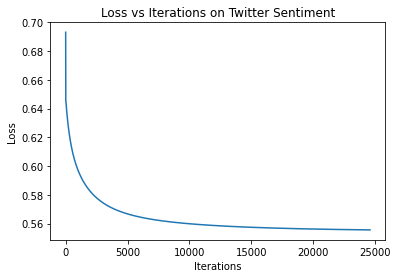

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations on Twitter Sentiment")
plt.plot(losses)
plt.show


In [ ]:
y_pred = LogRegSent.predict(X_test_norm)

In [ ]:
cm = LogRegSent.metrics(y_pred, y_test)

The confusion matrix is: 
[903, 1282]
[433, 3640]
The accuracy for the Twitter sentiment is 0.7259507829977628
The precision for the Twitter sentiment is 0.7395367736692402
The recall for the Twitter sentiment is 0.8936901546771422
The F1 score for the Twitter sentiment is 0.8093385214007782


#Test 1 Additional Feature

In [ ]:
def try_add_feature(x,y,feat,target):
  x_1=x
  x_1.insert(1, feat.name, feat)
  X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)
  X_train_norm, X_test_norm = mms.fit_transform(X_train), mms.transform(X_test)
  feature_number, lr, epochs = X_train.shape[1], .4, 1000000
  LogRegSent = LogRegression(feature_number, lr, epochs)
  losses = LogRegSent.fit(X_train_norm, y_train)
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.title("Loss vs Iterations on Twitter Sentiment")
  plt.plot(losses)
  plt.show
  y_pred = LogRegSent.predict(X_test_norm)
  cm = LogRegSent.metrics(y_pred, y_test)
  f1=(2*cm[1][1]/(cm[1][1]+cm[0][1]))*(cm[1][1]/(cm[1][1]+cm[1][0]))/((cm[1][1]/(cm[1][1]+cm[1][0]))+(cm[1][1]/(cm[1][1]+cm[0][1])))
  print("The F1 with " + str(feat.name) + " is: " + str(f1) + " but the target was: " +str(target))
  diff=target-f1
  print("The difference in F1 score with " + str(feat.name) + " is: " + str(diff))
  return diff



In [ ]:
f1_selected = 0.8089763431350873
new=dfc['feature5']

The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.605841406975341
The iteration is 2000 and the loss is 0.5881534118263008
The iteration is 3000 and the loss is 0.5789811223523071
The iteration is 4000 and the loss is 0.573613015242702
The iteration is 5000 and the loss is 0.5701718337192365
The iteration is 6000 and the loss is 0.5678059989310981
The iteration is 7000 and the loss is 0.566087960363166
The iteration is 8000 and the loss is 0.564785312513452
The iteration is 9000 and the loss is 0.5637634126528088
The iteration is 10000 and the loss is 0.5629400229140847
The iteration is 11000 and the loss is 0.5622625784552363
The iteration is 12000 and the loss is 0.5616960958581517
The iteration is 13000 and the loss is 0.5612164198622298
The iteration is 14000 and the loss is 0.5608062961802927
The iteration is 15000 and the loss is 0.5604530086454269
The iteration is 16000 and the loss is 0.5601469150154257
The iteration is 17000 and the 

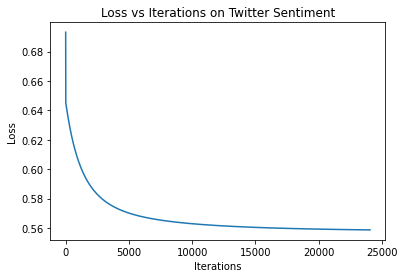

In [ ]:
diff5=try_add_feature(Xc_selected,yc,new,f1_selected)

In [ ]:
diff5

0.0020209770923361736

The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.6046684352686605
The iteration is 2000 and the loss is 0.5870320808235462
The iteration is 3000 and the loss is 0.5779748347259114
The iteration is 4000 and the loss is 0.5726767906821468
The iteration is 5000 and the loss is 0.5692669718045448
The iteration is 6000 and the loss is 0.5669092964108614
The iteration is 7000 and the loss is 0.5651870515520611
The iteration is 8000 and the loss is 0.5638741710345649
The iteration is 9000 and the loss is 0.5628394883886692
The iteration is 10000 and the loss is 0.562002601842813
The iteration is 11000 and the loss is 0.5613118801477889
The iteration is 12000 and the loss is 0.5607327867306838
The iteration is 13000 and the loss is 0.560241354606439
The iteration is 14000 and the loss is 0.5598203830000151
The iteration is 15000 and the loss is 0.5594571412519329
The iteration is 16000 and the loss is 0.5591419403917197
The iteration is 17000 and th

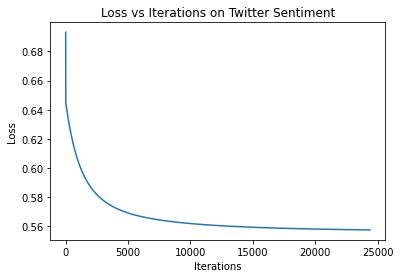

In [ ]:
new=dfc['feature6']
diff6=try_add_feature(Xc_selected,yc,new,f1_selected)

In [ ]:
removed_features=[df['feature5'],df['feature6'],df['feature7'],df['feature10'],df['feature11'],df['feature12']]

In [ ]:
f1_diff=[]
f1_selected = 0.8089763431350873
for i in range(0,len(removed_features)):
  new=removed_features[i]
  difference=try_add_feature(Xc_selected,yc,new,f1_selected)
  f1_diff.append(difference)
for i in range(0,len(removed_features)):
  print("To remove " + str(removed_features[i].name) + " there was a loss of " + str(f1_diff[i]) + " in F1")

ValueError: ignored

In [ ]:
for i in range(0,len(removed_features)):
  print("To remove " + str(removed_features[i].name) + " there was a loss of " + str(f1_diff[i]) + " in F1")

#Verify our LogReg against sklearn

The confusion matrix for Twitter sentinment:
[[ 903 1282]
 [ 433 3640]]


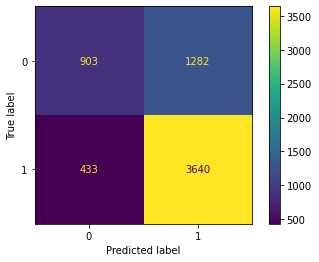

In [ ]:
#calling sklearn to compare. checks out my math above is correct!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_twitter = confusion_matrix(y_test, y_pred)
print("The confusion matrix for Twitter sentinment:")
print(confusion_matrix_twitter)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_twitter)
disp.plot()
plt.show()

In [ ]:
from sklearn import metrics 
print("The confusion matrix for Twitter sentiment:")
print(confusion_matrix_twitter)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

The confusion matrix for Twitter sentiment:
[[ 903 1282]
 [ 433 3640]]
Accuracy: 0.7259507829977628
Precision: 0.7395367736692402
Recall: 0.8936901546771422
F1 Score: 0.8093385214007782


In [ ]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y_test

709      1
5405     1
4034     1
21857    0
2098     0
        ..
6528     1
18615    1
1397     1
5312     1
5564     1
Name: Label, Length: 6258, dtype: int64

The confusion matrix for Twitter sentiment:
[[1563 2045]
 [ 781 5937]]


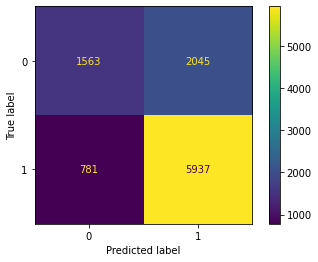

Accuracy: 0.726321905868681
Precision: 0.7437985467301428
Recall: 0.8837451622506698
F1:


(None, 0.8077551020408164)

In [ ]:
#I implemented it from scratch above, just using this as a benchmark to test my code. 
#My code's metrics are really really close so I consider that a win
from sklearn import metrics  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#X=np.concatenate((X_train_norm, X_test_norm))
#y=np.concatenate((y_train, y_test))
#y.loc[y.Label == 2, 'Label'] = 1
X_train2, X_test2, y_train2, y_test2 = train_test_split(
Xc, yc, test_size=0.33, random_state=42)
#X_train2, X_test2, y_train2, y_test2 = X_train_norm, X_test_norm, y_train, y_test
goodmodel = LogisticRegression()
goodmodel.fit(X_train2, y_train2)
y_pred2 = pd.Series(goodmodel.predict(X_test2))
confusion_matrix_twitter2 = confusion_matrix(y_test2, y_pred2)
print("The confusion matrix for Twitter sentiment:")
print(confusion_matrix_twitter2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_twitter2)
disp.plot()
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))
print("Precision:", metrics.precision_score(y_test2, y_pred2))
print("Recall:", metrics.recall_score(y_test2, y_pred2))
print("F1:"), metrics.f1_score(y_test2, y_pred2)

In [ ]:
y_test2

709      1
5405     1
4034     1
21857    0
2098     0
        ..
3884     0
15808    1
23212    0
2498     1
13899    1
Name: Label, Length: 10326, dtype: int64

In [ ]:
y_pred2

0        1
1        1
2        1
3        1
4        1
        ..
10321    1
10322    1
10323    1
10324    1
10325    1
Length: 10326, dtype: int64

In [ ]:
print("Complete")

Complete


In [ ]:
# Allow about 16min for runtime
#Extract all features and put them in on data frame

def feature_extraction(data_location, label_location):
  df = pd.read_csv(data_location, header=None)
  df.columns = ['TWEET']

  df["Tweet Tokens"] = np.nan
  df["Count: Words in + Lexicon"] = np.nan
  df["Count: Words in - Lexicon"] = np.nan
  df["Contain The word NO? "] = np.nan
  df["Count: Nouns"] = np.nan
  df["Ratio: Unique Words-Total Words"] = np.nan
  df["Ratio: Stop Words-Total Words"] = np.nan
  df["Count: Adjectives in Tweet"] = np.nan
  df["Log: Tweet word count"] = np.nan
  df["Log: Length of Longest Word in Tweet"] = np.nan
  df["Log: Count of Words with 5+ Characters"] = np.nan

  # ADD LABELS COLUMN TO DF 
  labels = pd.read_csv(label_location, sep="\n", header=None)
  df = pd.concat([df,labels], axis = 1)
  df.rename(columns = {0:'Labels'}, inplace = True)

  # DROP NEUTRAL LABELS FROM DF
  df.drop(df.loc[df['Labels']==1].index, inplace=True)
  df = df.reset_index(drop=True)

  # CHANGE ALL 2 LABEL VALUES TO 1 
  for i in range(0, len(df.index)):
    if df['Labels'].values[i] == 2:
      df.at[i,'Labels'] = 1

  # CLEAN TWEETS
  pattern_a = r'[^A-Za-z0-9]+'
  pattern_b = r'\b\w{1,1}\b'
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)

  for i in range(0, len(df.index)):                       
    df['TWEET'].values[i] = df['TWEET'].values[i].lower()
    df['TWEET'].values[i] = df['TWEET'].values[i].replace('@user', '')
    df['TWEET'].values[i] = re.sub(pattern_a, ' ', df['TWEET'].values[i])
    df['TWEET'].values[i] = re.sub(pattern_b, '', df['TWEET'].values[i])
    df['TWEET'].values[i] = re.sub(emoji_pattern, '', df['TWEET'].values[i])

  #TOKENIZE TWEETS
  df['Tweet Tokens'] = df['Tweet Tokens'].astype('object')
  for i in range(0, len(df.index)):
    
    tokens = df['TWEET'].values[i].split()
    df.at[i, 'Tweet Tokens'] = tokens

  #Create Positive and Negative Lexicons
  pos_lexicon = []
  neg_lexicon = []

  for i in range(0, len(subreddit_dataframes)):               
    for j in range(0, len(subreddit_dataframes[i].index)):    

      if subreddit_dataframes[i]['Sentiment Score'].values[j] >= 0:         
        pos_lexicon.append(subreddit_dataframes[i]['Word'].values[j])        
      
      if subreddit_dataframes[i]['Sentiment Score'].values[j] < 0:         
        neg_lexicon.append(subreddit_dataframes[i]['Word'].values[j])        


  pos_lexicon = [*set(pos_lexicon)]   # Remove duplicate values from + lexicon
  neg_lexicon = [*set(neg_lexicon)]   # Remove duplicate values from - lexicon


  #Handle duplicate words in postitive and negative lexicon
  same_wrds = set(pos_lexicon).intersection(neg_lexicon)      #get set of all words that appear in both psoitive and Negative Lexicon
                                                              #https://stackoverflow.com/questions/1388818/how-can-i-compare-two-lists-in-python-and-return-matches

  word_vals_dict = dict.fromkeys(same_wrds, 0)                # Create a dictionary to hold of all words found in positive and negative lexicons     
  sentiment_vals2sum = []

  for k in range(0, len(same_wrds)):    # In the set of words identified in positive and negative lexicon
  
    i = same_wrds.pop()                 # i will return one word from the set, then the following with each iteration
    same_wrds.add(i)                    # https://stackoverflow.com/questions/59825/how-to-retrieve-an-element-from-a-set-without-removing-it

    sentiment_vals2sum = []             # Will store the Sentiment Scores collected across data frames 

    for j in range(0, len(subreddit_dataframes)):                    # in range of dataframes(44)
      is_wrd_there = i in subreddit_dataframes[j]['Word'].unique()   # Return true or false. True if desired word 'i' is in the data frame being checked false if not (ls_df_names[0], ls_df_names[1],...)
      if is_wrd_there is True:                              # If true... 

        mask1 = subreddit_dataframes[j]['Word'].values == i                  # Get the sentiment value of the word from its dataframe 
                                                                    # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
                                                      
        sentiment_vals2sum.append(subreddit_dataframes[j][mask1].iat[0,1])   # append sentiment value to list where they are stored eg. sentiment_vals2sum 
        num_avg = mean(sentiment_vals2sum)                          # Take the mean of the sentiment scores collected in the list above(these are all sentiment scores for one word collected across dataframes where the word was found 'True')
        word_vals_dict[i] = num_avg  

  # Remove words that now have a clear positive or negative classification
  for w in word_vals_dict.items():        # .items() returns a tuple of (word, score). See Cell above for all words: scores in dict
    if w[1] >= 0:                         # if w[1] (the score) is greater than 0...
      neg_lexicon.remove(w[0])            # remove it from the negative lexicon
    if w[1] < 0:                          # If w[1] (the score) is less than 0...
      pos_lexicon.remove(w[0])            # remove the word from the positive lexicon

  # COUNT POSITIVE AND NEGATIVE WORDS
  neg_lex_set = set(neg_lexicon)
  pos_lex_set = set(pos_lexicon)

  for i in range(0, len(df.index)):
    x = set(df['Tweet Tokens'][i])
    df['Count: Words in + Lexicon'].values[i] = len(x.intersection(pos_lex_set))
    df['Count: Words in - Lexicon'].values[i] = len(x.intersection(neg_lex_set))

  # DOES TWEET CONTAIN NO
  for i in range(0, len(df.index)):                       # In the range 0 to length of the tweets dataframe         # Tokenize and lowercase tweets 
    if 'no' in df['Tweet Tokens'][i]:                                    # If no is in tweet dataframe value is 1 if not value is zero
      df['Contain The word NO? '].values[i] = 1
    else: 
      df['Contain The word NO? '].values[i] = 0

  # COUNT NOUNS IN TWEET
  for i in range(0, len(df.index)):
    tokens = df['Tweet Tokens'][i]
    tokens = [w for w in tokens if not w in stop_words]
    tagged = nltk.pos_tag(tokens)

    noun_definitions = ['NN', 'NNS', 'NNP', 'NNPS']
    count = 0

    for j in range(0, len(tagged)):
      if tagged[j][1] in noun_definitions:
        count += 1
    
    df['Count: Nouns'].values[i] = count    

  # RATIO: UNIQUE TO TOTAL WORDS
  for i in range(0, len(df.index)):                       
    tokens = df['Tweet Tokens'][i]
    x = np.array(tokens)
    ratio = len(np.unique(x)) / len(tokens)
    df['Ratio: Unique Words-Total Words'].values[i] = ratio    

  # STOP WORDS TO TOTAL WORDS
  for i in range(0, len(df.index)):                       
    tokens = df['Tweet Tokens'][i]
    x = np.array(tokens)
    stop_wrds_count = [w for w in tokens if w in stop_words]
    ratio = len(stop_wrds_count) / len(tokens)
    df['Ratio: Stop Words-Total Words'].values[i] = ratio

  #ADJECTIVES IN TWEET
  for i in range(0, len(df.index)):
    tokens = df['Tweet Tokens'][i]
    tokens = [w for w in tokens if not w in stop_words]
    tagged = nltk.pos_tag(tokens)

    adj_definitions = ['JJ', 'JJR', 'JJS ']
    count = 0

    for j in range(0, len(tagged)):
      if tagged[j][1] in adj_definitions:
        count += 1
    
    df['Count: Adjectives in Tweet'].values[i] = count

  # LOG OF TWEET WORD COUNT 
  for i in range(0, len(df.index)):           #In range: length of dataframe of tweets
    tokens = df['Tweet Tokens'][i]       #tokenize tweets 
    log_val = math.log(len(tokens))
    df['Log: Tweet word count'].values[i] = log_val


  # LOG LENGTH OF LONGEST WORD IN TWEET
  for i in range(0, len(df.index)):           #In range: length of dataframe of tweets
    tokens = df['Tweet Tokens'][i]   #tokenize tweets 
    longest_wrd = max(tokens, key=len)
    log_val =  math.log(len(longest_wrd))
    df['Log: Length of Longest Word in Tweet'].values[i] = log_val

  #LOG OF COUNT OF WORD WITH 5+ CHARACTERS
  for i in range(0, len(df.index)):           #In range: length of dataframe of tweets
    tokens = df['Tweet Tokens'][i]    #tokenize tweets
    count = 0
      
    if any(len(i) >= 5 for i in tokens) is True:

      for j in range(0, len(tokens)):
        if len(tokens[j]) >= 5:
          count = count +1

      log_val = math.log(count)
      df['Log: Count of Words with 5+ Characters'].values[i] = log_val
      
    else:
      df['Log: Count of Words with 5+ Characters'].values[i] = 0


  return(df)

In [ ]:
#How to run: 
# dataframe = feature_extraction(data_location, label_location)